In [259]:
#Load the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import skew, kurtosis
!pip install scikit-plot
import pandas as pd
from sklearn import metrics
from sklearn.linear_model import LogisticRegression


In [260]:
#Load the Dataset
data = pd.read_csv("/content/Marketing Campaign data (1).csv")

In [261]:
#Understanding the data type of each variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   CUST_ID                  1500 non-null   int64 
 1   CUST_GENDER              1500 non-null   object
 2   AGE                      1500 non-null   int64 
 3   CUST_MARITAL_STATUS      1500 non-null   object
 4   COUNTRY_NAME             1500 non-null   object
 5   CUST_INCOME_LEVEL        1500 non-null   object
 6   EDUCATION                1500 non-null   object
 7   OCCUPATION               1500 non-null   object
 8   HOUSEHOLD_SIZE           1500 non-null   object
 9   YRS_RESIDENCE            1500 non-null   int64 
 10  AFFINITY_CARD            1500 non-null   int64 
 11  BULK_PACK_DISKETTES      1500 non-null   int64 
 12  FLAT_PANEL_MONITOR       1500 non-null   int64 
 13  HOME_THEATER_PACKAGE     1500 non-null   int64 
 14  BOOKKEEPING_APPLICATION  1500 non-null  

In [262]:
#Display summary statistics
data.describe()

,CUST_ID,AGE,YRS_RESIDENCE,AFFINITY_CARD,BULK_PACK_DISKETTES,FLAT_PANEL_MONITOR,HOME_THEATER_PACKAGE,BOOKKEEPING_APPLICATION,PRINTER_SUPPLIES,Y_BOX_GAMES,OS_DOC_SET_KANJI
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.0000,1500.000000,1500.000000,1500.000000,1500.0,1500.000000,1500.000000
mean,102250.500000,38.892000,4.088667,0.253333,0.6280,0.582000,0.575333,0.880667,1.0,0.286667,0.002000
std,433.157015,13.636384,1.920919,0.435065,0.4835,0.493395,0.494457,0.324288,0.0,0.452355,0.044692
min,101501.000000,17.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000
25%,101875.750000,28.000000,3.000000,0.000000,0.0000,0.000000,0.000000,1.000000,1.0,0.000000,0.000000
50%,102250.500000,37.000000,4.000000,0.000000,1.0000,1.000000,1.000000,1.000000,1.0,0.000000,0.000000
75%,102625.250000,47.000000,5.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.0,1.000000,0.000000
max,103000.000000,90.000000,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000


In [263]:
#Check if the data has any missing, null, or blank values
data.isnull().sum()

CUST_ID                     0
CUST_GENDER                 0
AGE                         0
CUST_MARITAL_STATUS         0
COUNTRY_NAME                0
CUST_INCOME_LEVEL           0
EDUCATION                   0
OCCUPATION                  0
HOUSEHOLD_SIZE              0
YRS_RESIDENCE               0
AFFINITY_CARD               0
BULK_PACK_DISKETTES         0
FLAT_PANEL_MONITOR          0
HOME_THEATER_PACKAGE        0
BOOKKEEPING_APPLICATION     0
PRINTER_SUPPLIES            0
Y_BOX_GAMES                 0
OS_DOC_SET_KANJI            0
COMMENTS                   73
dtype: int64

In [264]:
#Checking data for age errors
age_errors = data[(data['AGE'] < 0) | (data['AGE'] > 120)]
print(age_errors)

Empty DataFrame
Columns: [CUST_ID, CUST_GENDER, AGE, CUST_MARITAL_STATUS, COUNTRY_NAME, CUST_INCOME_LEVEL, EDUCATION, OCCUPATION, HOUSEHOLD_SIZE, YRS_RESIDENCE, AFFINITY_CARD, BULK_PACK_DISKETTES, FLAT_PANEL_MONITOR, HOME_THEATER_PACKAGE, BOOKKEEPING_APPLICATION, PRINTER_SUPPLIES, Y_BOX_GAMES, OS_DOC_SET_KANJI, COMMENTS]
Index: []


In [265]:
#Checking household size column for errors
data['HOUSEHOLD_SIZE'].unique()

array(['2', '3', '9+', '06-Aug', '1', '04-May'], dtype=object)

In [266]:
#Reducing variables
del_var = ['CUST_ID', 'COMMENTS', 'BULK_PACK_DISKETTES', 'FLAT_PANEL_MONITOR', 'HOME_THEATER_PACKAGE', 'BOOKKEEPING_APPLICATION','PRINTER_SUPPLIES', 'Y_BOX_GAMES', 'OS_DOC_SET_KANJI']
#deleting unneccessary variables
data = data.drop(del_var, axis=1)


In [267]:
#There are no missing values to be removed
data.isna().sum()


CUST_GENDER            0
AGE                    0
CUST_MARITAL_STATUS    0
COUNTRY_NAME           0
CUST_INCOME_LEVEL      0
EDUCATION              0
OCCUPATION             0
HOUSEHOLD_SIZE         0
YRS_RESIDENCE          0
AFFINITY_CARD          0
dtype: int64

In [268]:
#Removing errors in HOUSEHOLD_SIZE column
data= data.drop(data[(data['HOUSEHOLD_SIZE'] == '06-Aug') | (data['HOUSEHOLD_SIZE'] == '04-May')].index)

In [269]:
#Transform CUST_GENDER into binary F - 0, M -1
data['CUST_GENDER'] = data['CUST_GENDER'].replace({'F': 0, 'M': 1})

In [270]:
#Transform COUNTRY_NAME into ordinal number based on their occurrence
data['COUNTRY_NAME'] = data['COUNTRY_NAME'].astype('category').cat.codes + 1


In [271]:
#Transform CUST_INCOME_LEVEL into 3 ordinal levels 1 – low income. 2 -middle income, and 3 – high income.
data['CUST_INCOME_LEVEL'] = data['CUST_INCOME_LEVEL'].replace( {'A: Below 30,000': 1,'B: 30,000 - 49,999': 1, 'C: 50,000 - 69,999':1,'D: 70,000 - 89,999':1, 'E: 90,000 - 109,999':2,'F: 110,000 - 129,999':2, 'G: 130,000 - 149,999':2, 'H: 150,000 - 169,999':2,'I: 170,000 - 189,999':3, 'J: 190,000 - 249,999':3, 'K: 250,000 - 299,999':3, 'L: 300,000 and above':3})


In [272]:
#Transforming EDUCATION into ordinal numbers based on USA education level in ascending order
data['EDUCATION'] = data['EDUCATION'].replace({'Presch.': 1,'1st-4th': 2,
    '5th-6th': 3,
    '7th-8th': 4,
    '9th': 5,
    '10th': 6,
    '11th': 7,
    '12th': 8,
    'HS-grad': 9,
    '< Bach.': 10,
    'Assoc-V': 11,
    'Assoc-A': 12,
    'Bach.': 13,
    'Masters': 14,
    'Profsc': 15,
    'PhD': 16})


In [273]:
#Transform HOUSEHOLD_SIZE into ordinal numbers based on number of people
data['HOUSEHOLD_SIZE'] = data['HOUSEHOLD_SIZE'].replace({'1': 1, '2': 2, '3':3, '9+':4})


In [274]:
#Verify the data now contains ordinal numbers for the specified columns
data

,CUST_GENDER,AGE,CUST_MARITAL_STATUS,COUNTRY_NAME,CUST_INCOME_LEVEL,EDUCATION,OCCUPATION,HOUSEHOLD_SIZE,YRS_RESIDENCE,AFFINITY_CARD
0,0,41,NeverM,18,3,14,Prof.,2,4,0
1,1,27,NeverM,18,3,13,Sales,2,3,0
2,0,20,NeverM,18,2,9,Cleric.,2,2,0
3,1,45,Married,18,1,13,Exec.,3,5,1
4,1,34,NeverM,18,3,14,Sales,4,5,1
...,...,...,...,...,...,...,...,...,...,...
1495,1,17,NeverM,18,1,6,Other,1,1,0
1496,1,41,Married,15,3,13,Exec.,3,4,0
1497,1,53,Married,18,3,9,Exec.,3,8,1
1498,1,55,Married,18,1,9,Cleric.,3,7,1


In [275]:
#Calculating Summary Statistics
Summary_Stats = data.describe()
#Calculating Skewness and Kurtosis only for numerical columns
numerical_cols = data.select_dtypes(include=['int', 'float']).columns
skewness = data[numerical_cols].apply(skew)
kurt = data[numerical_cols].apply(kurtosis)


In [276]:
#Create a seperate dataframe for skewness and kurtosis
skew_kurt_df = pd.DataFrame({'skewness': skewness, 'kurtosis': kurt})

In [277]:
#Combine summary stats and skew_kurt dataframe
summary_stats_with_skew_kurt = pd.concat([Summary_Stats, skew_kurt_df.T])

In [278]:
#summary statistics of all variables
print("Summary Statistics with Skewness and Kurtosis:")
print(summary_stats_with_skew_kurt)

Summary Statistics with Skewness and Kurtosis:
          CUST_GENDER          AGE  COUNTRY_NAME  CUST_INCOME_LEVEL  \
count     1381.000000  1381.000000   1381.000000        1381.000000   
mean         0.708907    39.069515     16.855177           2.409848   
std          0.454431    13.576710      3.768196           0.740166   
min          0.000000    17.000000      1.000000           1.000000   
25%          0.000000    28.000000     18.000000           2.000000   
50%          1.000000    38.000000     18.000000           3.000000   
75%          1.000000    48.000000     18.000000           3.000000   
max          1.000000    90.000000     18.000000           3.000000   
skewness    -0.919753     0.577598           NaN          -0.819907   
kurtosis    -1.154054     0.004470           NaN          -0.731341   

            EDUCATION  HOUSEHOLD_SIZE  YRS_RESIDENCE  AFFINITY_CARD  
count     1381.000000     1381.000000    1381.000000    1381.000000  
mean        10.188993        2.

In [279]:
#Python program to show histogram plot of a selected variable
def plot_histogram(columns, data):
    for col in columns:
        plt.figure(figsize=(8, 6))
        plt.hist(data[col], bins=20, color='skyblue', edgecolor='black')
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()


Choose a variable to plot histogram (or type 'exit' to quit):
1. CUST_GENDER
2. AGE
3. CUST_MARITAL_STATUS
4. COUNTRY_NAME
5. CUST_INCOME_LEVEL
6. EDUCATION
7. OCCUPATION
8. HOUSEHOLD_SIZE
9. YRS_RESIDENCE
10. AFFINITY_CARD
Enter your choice: 2


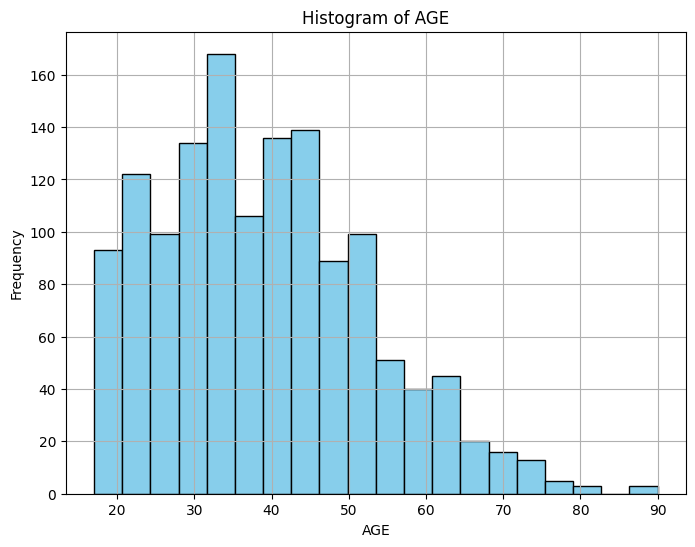

Choose a variable to plot histogram (or type 'exit' to quit):
1. CUST_GENDER
2. AGE
3. CUST_MARITAL_STATUS
4. COUNTRY_NAME
5. CUST_INCOME_LEVEL
6. EDUCATION
7. OCCUPATION
8. HOUSEHOLD_SIZE
9. YRS_RESIDENCE
10. AFFINITY_CARD
Enter your choice: exit


In [295]:
#Show histogram plot of a variable which allows a user to choose in runtime
while True:
    print("Choose a variable to plot histogram (or type 'exit' to quit):")
    print("\n".join([f"{i+1}. {col}" for i, col in enumerate(data.columns)]))
    choice = input("Enter your choice: ")

    if choice.lower() == 'exit':
        break
    elif choice.isdigit() and 1 <= int(choice) <= len(data.columns):
        column_index = int(choice) - 1
        selected_variable = data.columns[column_index]
        plot_histogram([selected_variable], data)
    else:
        print("Invalid choice. Please try again.\n")

In [282]:
#	selecting 1000 random customer records from the transformed data
#Random state parameter ensures reproducability of data
LogisticRegressionData = data.sample(n=1000, random_state=20)
LogisticRegressionData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1197 to 482
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   CUST_GENDER          1000 non-null   int64 
 1   AGE                  1000 non-null   int64 
 2   CUST_MARITAL_STATUS  1000 non-null   object
 3   COUNTRY_NAME         1000 non-null   int8  
 4   CUST_INCOME_LEVEL    1000 non-null   int64 
 5   EDUCATION            1000 non-null   int64 
 6   OCCUPATION           1000 non-null   object
 7   HOUSEHOLD_SIZE       1000 non-null   int64 
 8   YRS_RESIDENCE        1000 non-null   int64 
 9   AFFINITY_CARD        1000 non-null   int64 
dtypes: int64(7), int8(1), object(2)
memory usage: 79.1+ KB


In [283]:
#Removing Non-numeric columns from the LogisticRegression dataframe
LogisticRegressionData = LogisticRegressionData.drop(columns=['CUST_MARITAL_STATUS', 'OCCUPATION'])

In [284]:
#Assign values to x and y
X = LogisticRegressionData.iloc[:, :-1]
y  = LogisticRegressionData.iloc[:,-1]

In [285]:
#Split the dataset into training and testing sets for both features
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test =train_test_split(X,y, random_state = 20, test_size = 0.30)

In [286]:
#Standardize the features
from sklearn import preprocessing
X_train_ST = preprocessing.scale(X_train)
X_test_ST = preprocessing.scale(X_test)

In [287]:
#Fitting the logistic regression model
from sklearn.linear_model import LogisticRegression
Model = LogisticRegression()
Model.fit(X_train_ST,y_train)

LogisticRegression()

In [288]:
#Calculating and printing the accuracy
from sklearn.metrics import accuracy_score
y_pred = Model.predict(preprocessing.scale(X_test))
print("Train data accuracy:", accuracy_score(y_true = y_train,y_pred=Model.predict(X_train)))
print("Test data accuracy:", accuracy_score(y_true = y_test, y_pred=y_pred))

Train data accuracy: 0.24285714285714285
Test data accuracy: 0.83


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [308]:
#Function prompting the user to enter customer information
def get_user_input():
    print("Enter customer information:")
    CUST_GENDER = input("CUST_GENDER: ")
    AGE = int(input("AGE: "))
    COUNTRY_NAME = input("COUNTRY_NAME: ")
    CUST_INCOME_LEVEL = int(input("CUST_INCOME_LEVEL: "))
    EDUCATION = input("EDUCATION: ")
    HOUSEHOLD_SIZE = int(input("HOUSEHOLD_SIZE: "))
    YRS_RESIDENCE = int(input("YRS_RESIDENCE: "))
    AFFINITY_CARD = input("AFFINITY_CARD: ")

In [311]:
#Function to predict outcome
def make_prediction(features):
    prediction = Model.predict(features)
    return prediction

In [318]:
#Entry point function for prediction application
def main():
    while True:
        print("\nChoose an option:")
        print("1. Enter customer information manually")
        print("2. Load customer information from file")
        print("3. Exit")
        choice = input("Enter your choice: ")
        if choice == '1':
            features = get_user_input()
            prediction = make_prediction(features)
            print("Predicted result:", prediction)
        elif choice == '2':
            file_path = input("Enter the path to the file: ")
            data = pd.read_csv(file_path)
            features = data.values  # Assuming all columns are features
            predictions = make_prediction(features)
            print("Predicted results:", predictions)
        elif choice == '3':
            break
        else:
            print("Invalid choice. Please try again.")
if __name__ == "__main__":
    main()


Choose an option:
1. Enter customer information manually
2. Load customer information from file
3. Exit
Enter your choice: 3


In [300]:
#import accuracy score
from sklearn.metrics import accuracy_score

In [301]:
#selecting 100 records from the remaining dataset
Accuracy_data = LogisticRegressionData.sample(n=100, random_state=42)

In [305]:
#Seperate features
X_test_100 = Accuracy_data.drop(columns=['AFFINITY_CARD'])
y_test_100 = Accuracy_data['AFFINITY_CARD']

In [306]:
#making predictions on the dataset
predictions_100 = Model.predict(X_test_100)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [307]:
#Calculating accuracy of the predictions
accuracy_100 = accuracy_score(y_test_100, predictions_100)
print("Accuracy using 100 records:", accuracy_100)

Accuracy using 100 records: 0.31
